In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
from pueblos.models import PueblosNoticias200, PueblosNc, PueblosCategoriasSemandal, PueblosNoticiasPalabras
from pueblos.common.util.utilities import limpiarTexto, levenshtein
from collections import defaultdict, OrderedDict

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Crea diccionario con categorías y sus palabras asociadas
palabras_categoria = defaultdict(dict)
palabras = PueblosNoticiasPalabras.objects.all()
repeticiones = {}
# palabras = PueblosNoticiasPalabras.objects.filter(palabra='ayuntamiento')
for palabra in palabras:
    categorias = palabra.get_categorias_string()
    my_word = palabra.palabra
    # print 'La palabra a comprobar es ' + palabra.palabra
    if my_word in repeticiones:
        repeticiones[my_word] += 1
    else:
        repeticiones[my_word] = 1
        
    for categoria in categorias:
        if categoria in palabras_categoria and my_word in palabras_categoria[categoria]:
            palabras_categoria[categoria][my_word] += 1
        else:
            palabras_categoria[categoria][my_word] = 1

print 'Terminado diccionario'

Terminado diccionario


In [4]:
# Genera los índices para cada palabra según la fórmula: nº apariciones categoria / total apariciones

for category, word in palabras_categoria.items():
    for w, value in word.items():
        # print "palabra " + w + " " + str(value) + " total " + str(repeticiones[w])
        indice = value / float(repeticiones[w])
        palabras_categoria[category][w] = indice
        
# for palabra in palabras_categoria['Asuntos Sociales'].items():
    # print palabra
        
print 'Terminados indices'

Terminados indices


In [3]:
# elimina palabras con solo 1 aparición del diccionario
for category, word in palabras_categoria.items():
    for w, value in word.items():
        if value <= 1:
            # print w + ' solo tiene '+ str(value) + ' referencias, por lo que sera borrado'
            del palabras_categoria[category][w]

dotes solo tiene 1 referencias, por lo que sera borrado
celebrado solo tiene 1 referencias, por lo que sera borrado
vuelta solo tiene 1 referencias, por lo que sera borrado
ganadores solo tiene 1 referencias, por lo que sera borrado
alergias solo tiene 1 referencias, por lo que sera borrado
alumnos solo tiene 1 referencias, por lo que sera borrado
emocionadas solo tiene 1 referencias, por lo que sera borrado
ganaderías solo tiene 1 referencias, por lo que sera borrado
otra solo tiene 1 referencias, por lo que sera borrado
funciones solo tiene 1 referencias, por lo que sera borrado
adicciones solo tiene 1 referencias, por lo que sera borrado
partieron solo tiene 1 referencias, por lo que sera borrado
participación solo tiene 1 referencias, por lo que sera borrado
existir solo tiene 1 referencias, por lo que sera borrado
noticia solo tiene 1 referencias, por lo que sera borrado
llavero solo tiene 1 referencias, por lo que sera borrado
conserveras solo tiene 1 referencias, por lo que sera

In [5]:
# Genera el diccionario ordenado por su índice

for categoria in palabras_categoria.items():
    value = categoria[0]
    palabras_categoria[value] = OrderedDict(sorted(palabras_categoria[value].items(), key= lambda x: x[1], reverse=True))
    
print 'Ordenado diccionario'

Ordenado diccionario


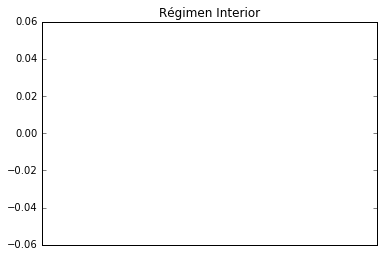

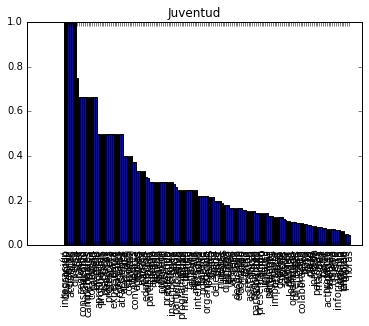

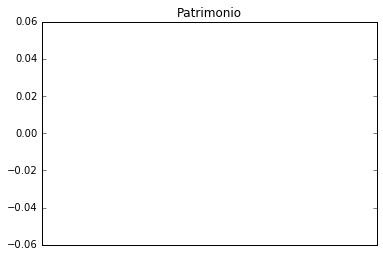

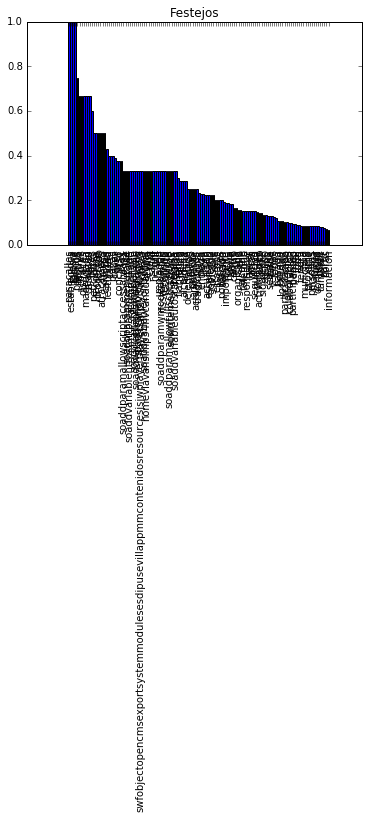

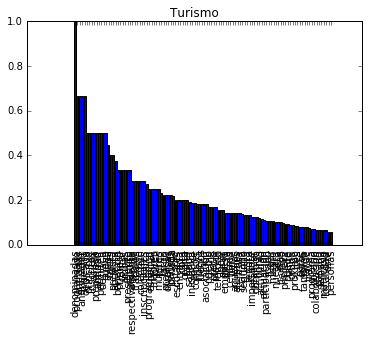

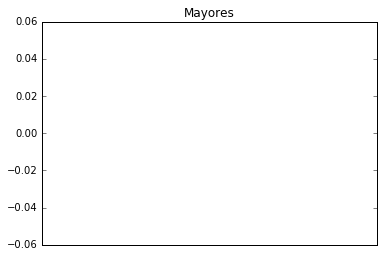

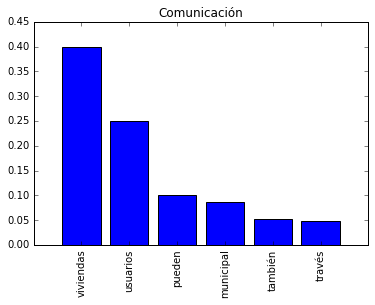

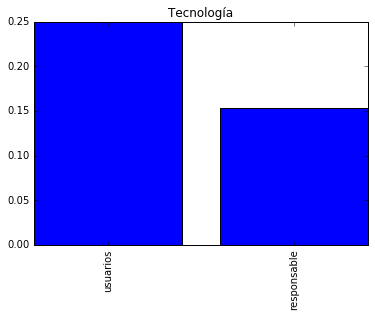

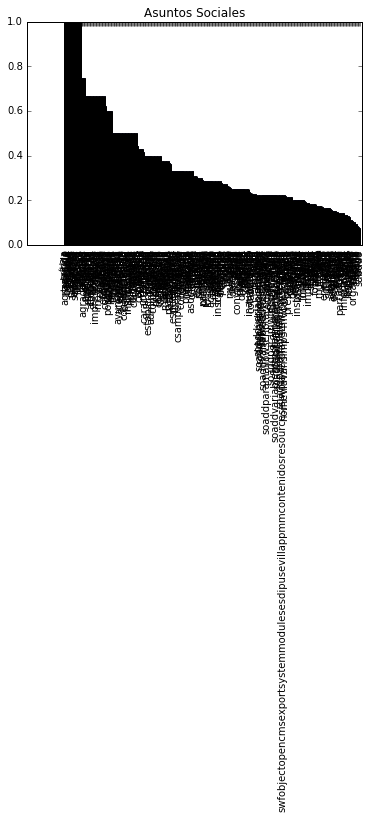

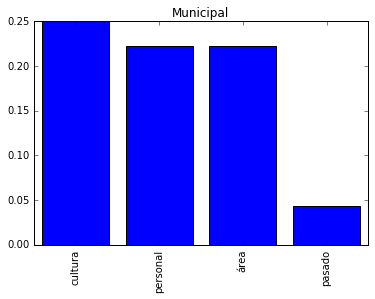

In [ ]:
# Genera gráficas para cada categoría
for category, word in palabras_categoria.items():
    plt.title(category)
    x = []
    y = []
    for w, value in word.items():
        x.append(w)
        y.append(value)
    plt.bar(range(len(y)), y, align='center')
    # plt.xticks(range(len(y)), x, size='small')
    plt.xticks(range(len(y)), x, rotation=90)
    plt.xlabel('palabras')
    plt.ylabel('n repetiten/n apariciones total', rotation='vertical')
    
    plt.show()